In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("spotify_analysis_dataset.csv")
print(df.shape)
df.head()

(50, 16)


,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,TRK1000,Song 0,Artist 7,Album 3,2010-01-01,240151,70,0.037,0.349,-2.87,0.522,0.616,0.931,0.947,0.353,110.14
1,TRK1001,Song 1,Artist 4,Album 5,2010-01-02,253767,58,0.610,0.726,-22.87,0.770,0.635,0.858,0.986,0.584,75.90
2,TRK1002,Song 2,Artist 13,Album 19,2010-01-03,244375,85,0.503,0.897,-1.33,0.216,0.045,0.429,0.753,0.078,154.02
3,TRK1003,Song 3,Artist 11,Album 7,2010-01-04,299262,27,0.051,0.887,-1.46,0.623,0.375,0.751,0.376,0.974,132.84
4,TRK1004,Song 4,Artist 8,Album 9,2010-01-05,256330,65,0.279,0.780,-5.88,0.085,0.626,0.755,0.084,0.986,168.12


In [4]:
df.info()

na = df.isna().sum().sort_values(ascending=False)
display(na[na > 0])

print("Duplicate track_id:", df["track_id"].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50 non-null     object 
 1   track_name        50 non-null     object 
 2   artist            50 non-null     object 
 3   album             50 non-null     object 
 4   release_date      50 non-null     object 
 5   duration_ms       50 non-null     int64  
 6   popularity        50 non-null     int64  
 7   danceability      50 non-null     float64
 8   energy            50 non-null     float64
 9   loudness          50 non-null     float64
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
dtypes: float64(9), int64(2), object(5)
memory usag

Series([], dtype: int64)

Duplicate track_id: 0


In [5]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
print("Invalid dates:", df["release_date"].isna().sum())

df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month

Invalid dates: 0


In [6]:
threshold = df["popularity"].quantile(0.45)
df["is_hit"] = (df["popularity"] >= threshold).astype(int)

print("Hit threshold (popularity >=):", threshold)
print(df["is_hit"].value_counts())

Hit threshold (popularity >=): 51.0
is_hit
1    28
0    22
Name: count, dtype: int64


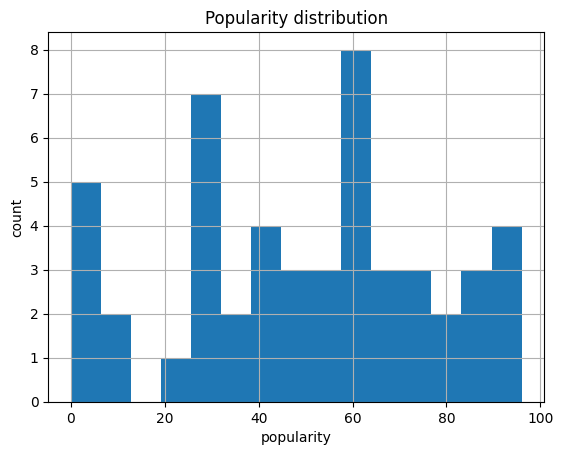

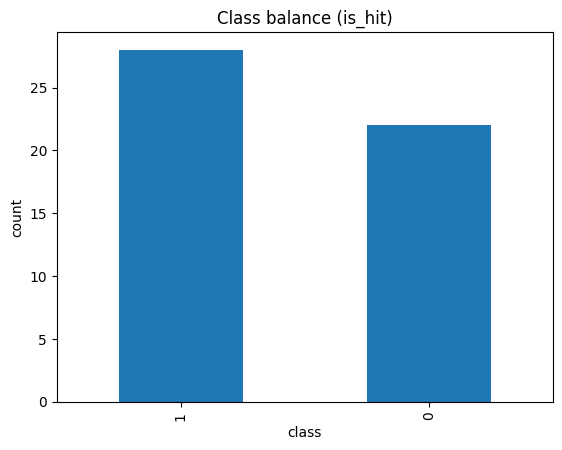

In [7]:
df["popularity"].hist(bins=15)
plt.title("Popularity distribution")
plt.xlabel("popularity")
plt.ylabel("count")
plt.show()

df["is_hit"].value_counts().plot(kind="bar")
plt.title("Class balance (is_hit)")
plt.xlabel("class")
plt.ylabel("count")
plt.show()

In [10]:
num_features = [ "release_date",
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration_ms"
]

df[num_features].describe().T

,count,mean,min,25%,50%,75%,max,std
release_date,50,2010-01-25 12:00:00,2010-01-01 00:00:00,2010-01-13 06:00:00,2010-01-25 12:00:00,2010-02-06 18:00:00,2010-02-19 00:00:00,NaN
danceability,50.0,0.4742,0.017,0.2385,0.5075,0.6765,0.986,0.29023
energy,50.0,0.506,0.005,0.23875,0.5725,0.725,0.973,0.299962
loudness,50.0,-17.696,-38.78,-26.265,-17.035,-7.6075,-0.4,11.567047
speechiness,50.0,0.45546,0.014,0.224,0.4735,0.687,0.976,0.278252
acousticness,50.0,0.49662,0.018,0.2175,0.5605,0.747,0.991,0.304199
instrumentalness,50.0,0.51774,0.011,0.2995,0.5275,0.7915,0.987,0.311123
liveness,50.0,0.52932,0.011,0.278,0.541,0.846,0.993,0.321099
valence,50.0,0.60708,0.026,0.37725,0.645,0.86125,1.0,0.305826
tempo,50.0,126.094,62.04,90.7625,126.59,152.945,197.2,39.179744


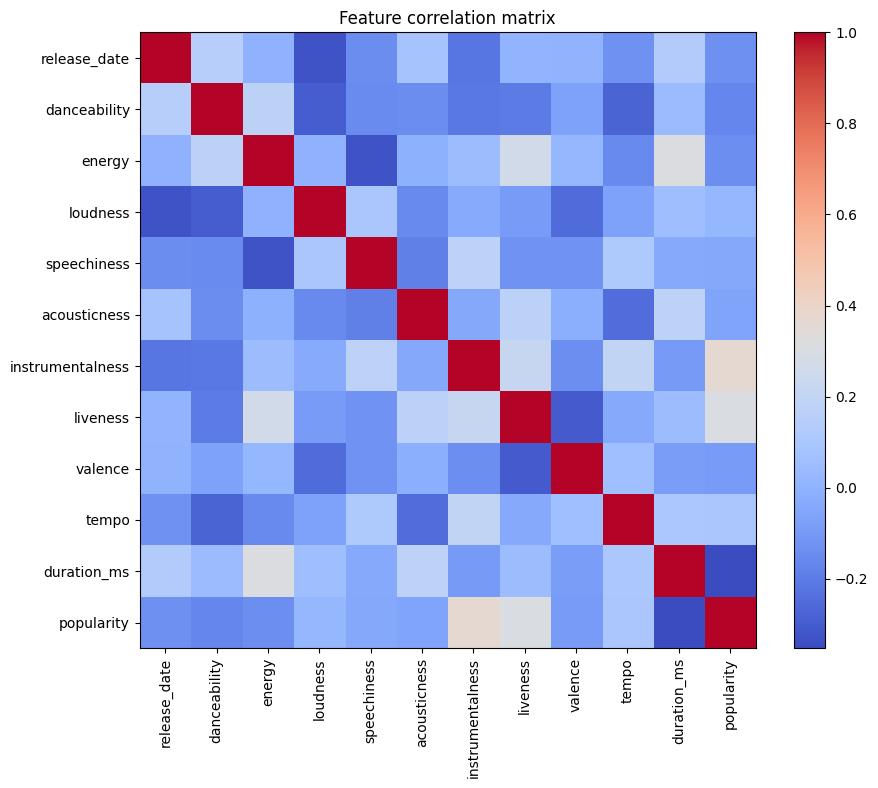

In [11]:
corr = df[num_features + ["popularity"]].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Feature correlation matrix")
plt.show()

In [12]:
group_means = df.groupby("is_hit")[num_features].mean().T
group_means

is_hit,0,1
release_date,2010-01-26 02:10:54.545454592,2010-01-25 00:51:25.714285824
danceability,0.552409,0.41275
energy,0.567227,0.457893
loudness,-17.704545,-17.689286
speechiness,0.438636,0.468679
acousticness,0.538364,0.463821
instrumentalness,0.381864,0.6245
liveness,0.448364,0.592929
valence,0.642818,0.579
tempo,122.214545,129.142143
